CS-E5885 Modeling biological networks (spring 2023)

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
data = pd.read_csv('data.csv', header = 0)

In [9]:
data.head()

,Time/gene,SWI5,CBF1,GAL4,GAL80,ASH1
0,0,0.0760,0.0419,0.0207,0.0225,0.1033
1,10,0.0186,0.0365,0.0122,0.0175,0.0462
2,20,0.0090,0.0514,0.0073,0.0165,0.0439
3,30,0.0117,0.0473,0.0079,0.0147,0.0371
4,40,0.0088,0.0482,0.0084,0.0145,0.0475


In [10]:
t_data = data['Time/gene'].to_numpy()
Y_data = data.drop(columns = ['Time/gene']).to_numpy()

## First view of the data

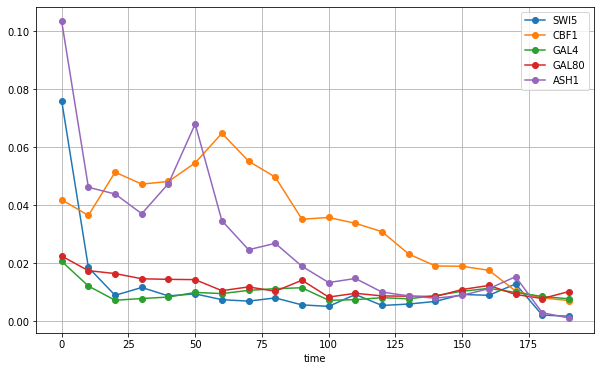

In [11]:
#observe data

plt.figure(figsize=(10,6))
plt.plot(t_data, Y_data, marker = "o")
plt.legend(data.columns[1:])
plt.xlabel('time')
plt.grid()
plt.show()

In [12]:
#observations:

## exo 5

## Choice of the first model - density karnel and arcne algorithm

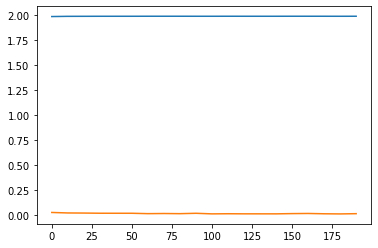

In [99]:
#aracne algorithm
#https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-7-S1-S7
#mutual information between the data 


#Karnel density estimator for each gene -> find the distribution of each gene
from sklearn.neighbors import KernelDensity
from scipy.stats import norm

kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(Y_data[:,0].reshape(-1,1))

log_dens = kde.score_samples(Y_data[:,3].reshape(-1,1))
plt.plot(t_data, np.exp(log_dens))
plt.plot(t_data, Y_data[:,3])
plt.show()

In [100]:
Y_data[:,0]

array([0.076 , 0.0186, 0.009 , 0.0117, 0.0088, 0.0095, 0.0075, 0.007 ,
       0.0081, 0.0057, 0.0052, 0.0093, 0.0055, 0.006 , 0.0069, 0.0093,
       0.009 , 0.0129, 0.0022, 0.0018])

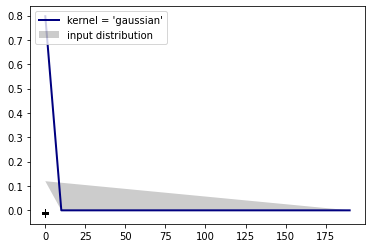

In [103]:
# Plot a 1D density example
N = 100

X = Y_data[:,0].reshape(-1, 1)

X_plot = t_data.reshape(-1,1)
#X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = 0.3 * norm(0, 1).pdf(X_plot[:, 0]) + 0.7 * norm(5, 1).pdf(X_plot[:, 0])

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc="black", alpha=0.2, label="input distribution")
colors = ["navy"]
kernels = ["gaussian"]
lw = 2


kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
log_dens = kde.score_samples(X_plot)
ax.plot(X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label="kernel = '{0}'".format(kernel),
    )

ax.legend(loc="upper left")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), "+k")

plt.show()

## Structure optimization : voisin algo and bootstramp

## ODE and optimization of the parameters k 

## Compute the score with cross validation / likelihood and BIC